In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, r'C:\code\astrocam')
import importlib
import rawpy
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from fwhm.star_finder import StarFinder
from fwhm.star_matcher import StarMatcher

In [2]:
pd.set_option("display.precision", 3)

In [3]:
from pathlib import Path

root = Path(r"D:\Astro\astro-pre-2022\M94-120-2500iso\light")
out_of_focus = root / "Image009.nef"
in_focus = root / "Image035.nef"
in_focus_753 = root / "Image043.nef"

s = StarFinder()

ref_data = s.getStarData(in_focus)
tgt_data = s.getStarData(in_focus_753)
ref_image, df_ref = ref_data["image"], ref_data["stars"]
tgt_image, df_tgt = tgt_data["image"], tgt_data["stars"]

Calculating FWHM: 100%|██████████| 96/96 [00:00<00:00, 439.58it/s]


In [4]:
matcher = StarMatcher()
df_match = matcher.matchStars(df_ref, df_tgt)

Matching triangles: 100%|██████████| 894/894 [00:01<00:00, 693.86it/s]


In [5]:
df_match

,area_ref,cluster_cx_ref,cluster_cy_ref,iwc_cx_ref,iwc_cy_ref,gaussian_cx_ref,gaussian_cy_ref,box_ref,tile_4_ref,tile_32_ref,...,gaussian_cx_tgt,gaussian_cy_tgt,box_tgt,tile_4_tgt,tile_32_tgt,fwhm_x_tgt,fwhm_y_tgt,starno,fwhm_x_diff,fwhm_y_diff
2,261,2928.747,2329.739,17.001,16.001,17.316,18.188,"[2910, 2312, 2947, 2347]",878388,13889,...,18.325,18.227,"[2913, 2307, 2950, 2344]",876881,13889,80.613,80.035,2,0.897,-2.617
3,252,1948.774,1247.262,16.001,16.001,17.563,17.332,"[1931, 1230, 1966, 1265]",470983,7432,...,18.446,16.495,"[1935, 1225, 1968, 1262]",469476,7432,73.038,77.637,3,5.894,0.507
4,233,4657.940,1943.918,16.001,14.001,15.952,18.423,"[4639, 1928, 4676, 1959]",734052,11675,...,15.185,18.844,"[4642, 1925, 4681, 1956]",732545,11675,59.582,49.532,4,-2.698,1.194
5,198,5241.924,3604.379,14.001,15.001,16.914,15.766,"[5226, 3588, 5257, 3621]",1360018,21521,...,18.349,16.661,"[5228, 3582, 5261, 3619]",1358511,21521,24.965,27.821,10,-0.989,-0.887
6,208,5063.173,1885.562,15.001,15.001,16.411,16.238,"[5047, 1869, 5080, 1902]",711534,11309,...,17.247,16.193,"[5050, 1864, 5083, 1899]",710027,11309,41.528,44.458,6,-0.961,-2.414
7,199,1951.236,1198.558,14.001,15.001,16.670,15.475,"[1936, 1182, 1967, 1215]",452888,7054,...,17.771,14.960,"[1940, 1177, 1971, 1212]",451381,7054,70.094,76.209,8,-1.202,-2.851
8,218,5656.523,826.014,13.001,18.001,18.989,14.560,"[5642, 807, 5671, 846]",313570,5091,...,17.875,15.446,"[5644, 804, 5675, 839]",310555,5091,18.450,21.615,5,-0.288,1.758
9,194,5885.026,1104.108,14.001,14.001,15.369,14.723,"[5870, 1089, 5901, 1120]",417679,6799,...,15.379,15.673,"[5872, 1085, 5903, 1116]",416172,6610,20.236,18.433,11,0.344,0.341
10,188,2377.989,1540.106,14.001,14.001,15.173,15.471,"[2362, 1525, 2393, 1556]",581174,9146,...,15.456,14.611,"[2366, 1520, 2395, 1551]",579667,9146,67.888,70.499,12,9.219,7.046
11,158,5325.905,468.063,12.001,14.001,15.046,13.427,"[5312, 453, 5339, 484]",177767,3001,...,17.796,12.675,"[5316, 446, 5343, 481]",176260,2813,27.386,34.081,17,-1.018,-3.645


77.41785193150277 80.03525157395642
78.14446825232393 77.63713818734209
50.72573710704505 49.53169275842454
26.933689129014084 27.820871944271122
42.043790063189476 44.457712492250636
73.35728469879174 76.20871388581374
23.37264862865068 21.615087446396405
18.77413038860034 18.433366783194508
77.54506447776315 70.49901975240884
30.43546309725513 34.08070042915875
62.289422833186826 54.32929860502393
44.39789035145202 45.07616577289307
58.637358840676434 57.57262258906195
68.54581876909589 63.836490048560215
60.8393851398698 46.735141862108954
50.06592220004578 45.06161684658643
55.0084417989067 61.44280691926333


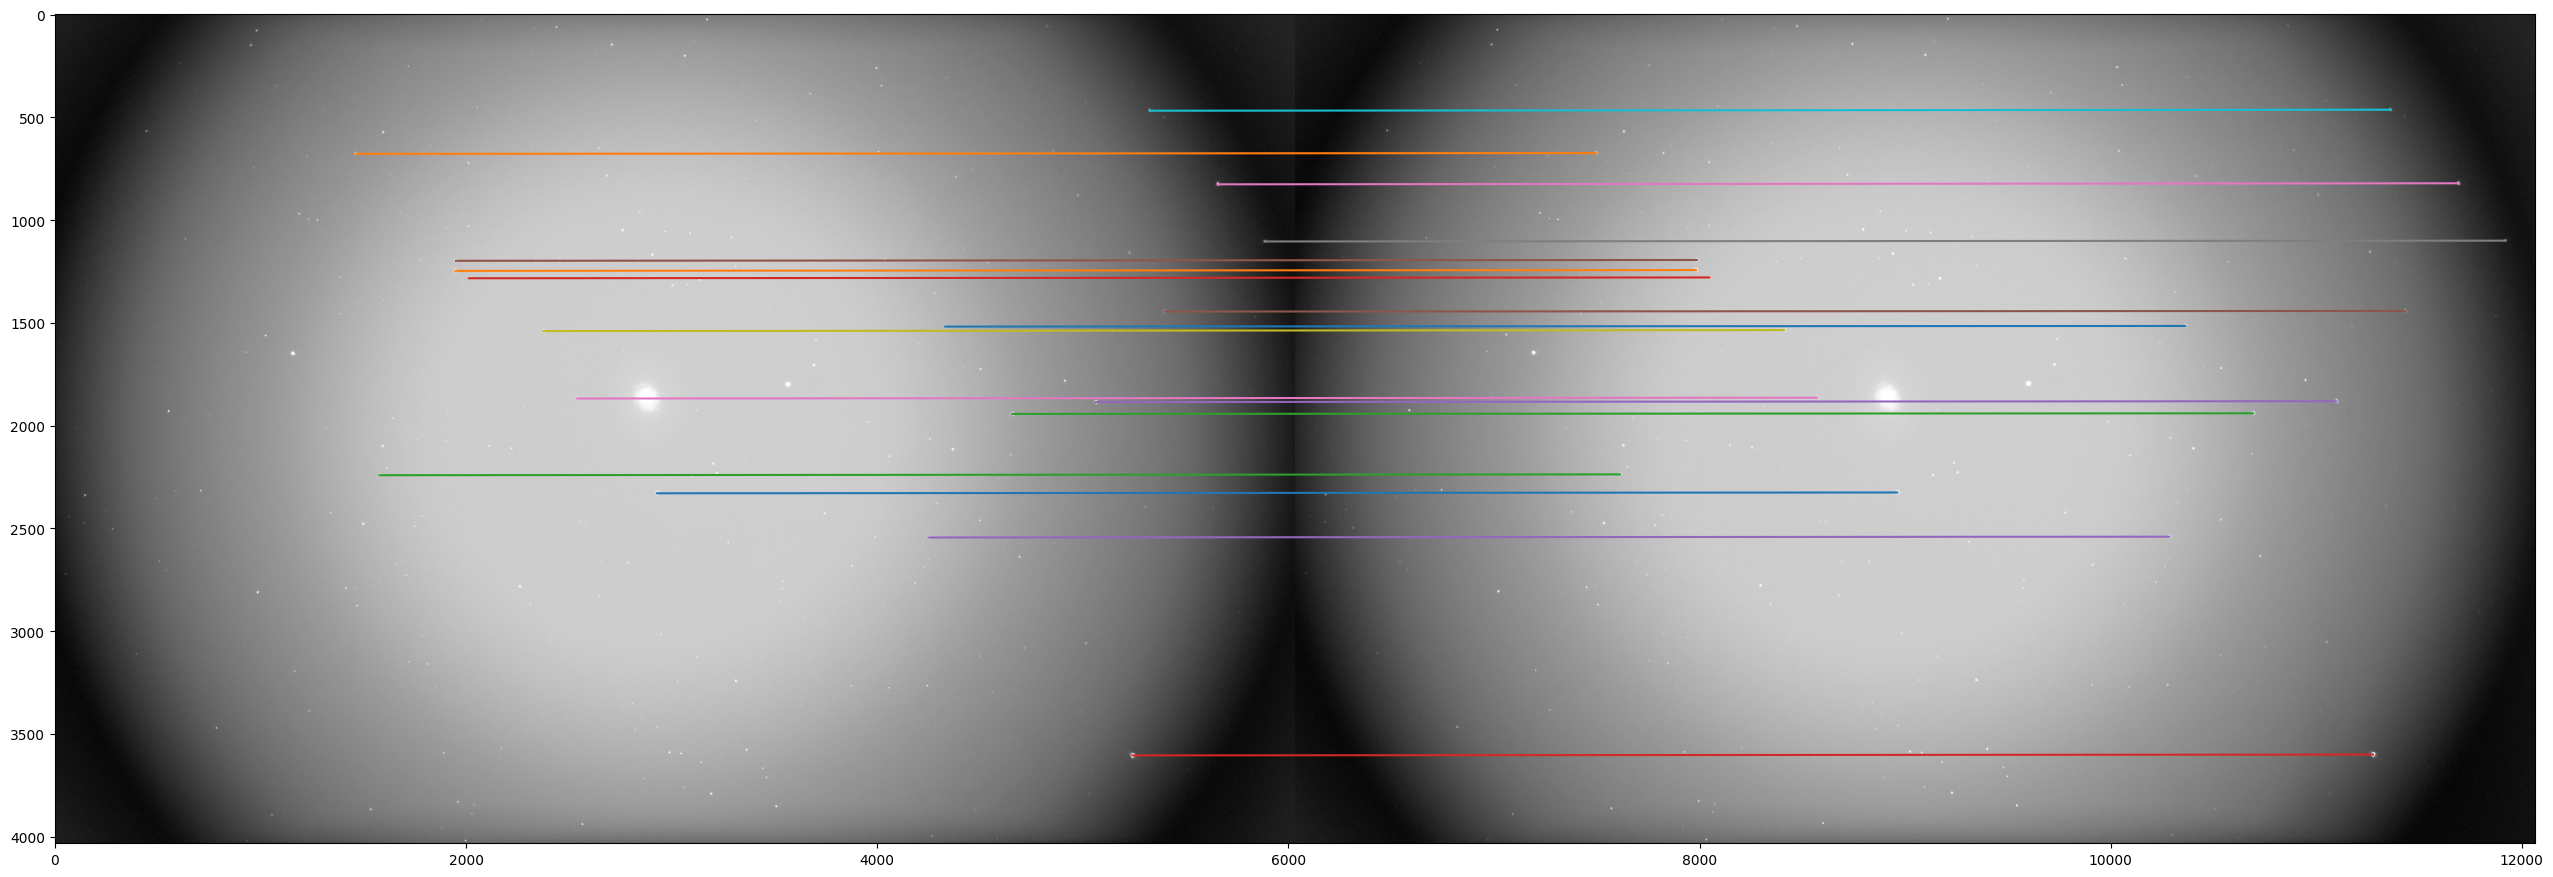

In [8]:
img = np.column_stack((ref_image,tgt_image))
fig = plt.figure(figsize=(32,16))
plt.imshow(img, cmap='gray')

for key, row in df_match.iterrows():
    x1,y1 = row.cluster_cx_ref, row.cluster_cy_ref
    x2,y2 = row.cluster_cx_tgt, row.cluster_cy_tgt
    print(row.fwhm_y_ref, row.fwhm_y_tgt)
    x2 += ref_image.shape[1]
    xs = [int(x1), int(x2)]
    ys = [int(y1), int(y2)]
    plt.plot(xs, ys)

plt.show()